In [1]:
import numpy as np 
import pandas as pd

In [2]:
stock_prices = pd.read_csv("stock_prices.csv")

stock_prices["Date"] = pd.to_datetime(stock_prices["Date"])

stock_prices = stock_prices[['Date','SecuritiesCode','Open','High','Low','Close','Volume', 'Target']]
stock_prices

,Date,SecuritiesCode,Open,High,Low,Close,Volume,Target
0,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,0.000730
1,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,0.012324
2,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,0.006154
3,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,0.011053
4,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,0.003026
...,...,...,...,...,...,...,...,...
2332526,2021-12-03,9990,514.0,528.0,513.0,528.0,44200,0.034816
2332527,2021-12-03,9991,782.0,794.0,782.0,794.0,35900,0.025478
2332528,2021-12-03,9993,1690.0,1690.0,1645.0,1645.0,7200,-0.004302
2332529,2021-12-03,9994,2388.0,2396.0,2380.0,2389.0,6500,0.009098


In [3]:
stock_li=  pd.read_csv("stock_list.csv")
stock_li = stock_li[['SecuritiesCode', 'Name']]
stock_li

,SecuritiesCode,Name
0,1301,"KYOKUYO CO.,LTD."
1,1305,Daiwa ETF-TOPIX
2,1306,NEXT FUNDS TOPIX Exchange Traded Fund
3,1308,Nikko Exchange Traded Index Fund TOPIX
4,1309,NEXT FUNDS ChinaAMC SSE50 Index Exchange Trade...
...,...,...
4412,9994,YAMAYA CORPORATION
4413,9995,"GLOSEL Co.,Ltd."
4414,9996,"Satoh&Co.,Ltd."
4415,9997,"BELLUNA CO.,LTD."


In [4]:
stocks = pd.merge(stock_prices, stock_li, on='SecuritiesCode')
stocks

,Date,SecuritiesCode,Open,High,Low,Close,Volume,Target,Name
0,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,0.000730,"KYOKUYO CO.,LTD."
1,2017-01-05,1301,2743.0,2747.0,2735.0,2738.0,17900,0.002920,"KYOKUYO CO.,LTD."
2,2017-01-06,1301,2734.0,2744.0,2720.0,2740.0,19900,-0.001092,"KYOKUYO CO.,LTD."
3,2017-01-10,1301,2745.0,2754.0,2735.0,2748.0,24200,-0.005100,"KYOKUYO CO.,LTD."
4,2017-01-11,1301,2748.0,2752.0,2737.0,2745.0,9300,-0.003295,"KYOKUYO CO.,LTD."
...,...,...,...,...,...,...,...,...,...
2332526,2021-11-29,4169,6970.0,7350.0,6970.0,6970.0,772500,0.009972,ENECHANGE Ltd.
2332527,2021-11-30,4169,6770.0,7240.0,6410.0,7020.0,887400,0.060649,ENECHANGE Ltd.
2332528,2021-12-01,4169,7190.0,7380.0,6670.0,7090.0,496800,-0.039894,ENECHANGE Ltd.
2332529,2021-12-02,4169,7160.0,7870.0,7110.0,7520.0,783000,-0.127424,ENECHANGE Ltd.


In [5]:
print(stock_prices.shape)

(2332531, 8)


In [6]:
print(stock_li.shape)

(4417, 2)


<ipython-input-7-b2a446d023ae>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = stocks.corr()


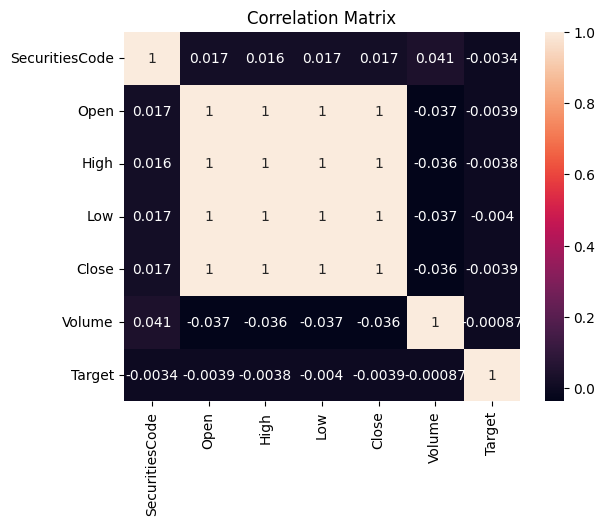

In [7]:
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt


# Calculate the correlation matrix
corr_matrix = stocks.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True)

# Add title
plt.title('Correlation Matrix')

# Show the plot
plt.show()


In [8]:
stocks.isna().sum()

Date                 0
SecuritiesCode       0
Open              7608
High              7608
Low               7608
Close             7608
Volume               0
Target             238
Name                 0
dtype: int64

In [9]:
# # stocks = stocks.fillna(stocks.mean(skipna=True))

# for col in stocks.columns:
#     stocks[col] = stocks[col].fillna(stocks[col].mean(skipna=True))

# # Show the resulting dataframe
# print(stocks)

In [10]:

stocks.dropna(inplace=True)


In [11]:

stock_prices.dropna(inplace=True)


In [12]:
stocks.isnull().sum()

Date              0
SecuritiesCode    0
Open              0
High              0
Low               0
Close             0
Volume            0
Target            0
Name              0
dtype: int64

In [13]:
stocks.duplicated().sum()

0

In [14]:
stocks.describe()

,SecuritiesCode,Open,High,Low,Close,Volume,Target
count,2.324923e+06,2.324923e+06,2.324923e+06,2.324923e+06,2.324923e+06,2.324923e+06,2.324923e+06
mean,5.895573e+03,2.594511e+03,2.626540e+03,2.561227e+03,2.594023e+03,6.942008e+05,4.262053e-04
std,2.403239e+03,3.577192e+03,3.619363e+03,3.533494e+03,3.576538e+03,3.917450e+06,2.339197e-02
min,1.301000e+03,1.400000e+01,1.500000e+01,1.300000e+01,1.400000e+01,1.000000e+02,-5.785414e-01
25%,3.891000e+03,1.022000e+03,1.035000e+03,1.009000e+03,1.022000e+03,3.070000e+04,-1.052632e-02
50%,6.240000e+03,1.812000e+03,1.834000e+03,1.790000e+03,1.811000e+03,1.079000e+05,0.000000e+00
75%,7.965000e+03,3.030000e+03,3.070000e+03,2.995000e+03,3.030000e+03,4.041000e+05,1.052632e-02
max,9.997000e+03,1.099500e+05,1.105000e+05,1.072000e+05,1.095500e+05,6.436540e+08,6.182380e-01


In [15]:
stocks

,Date,SecuritiesCode,Open,High,Low,Close,Volume,Target,Name
0,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,0.000730,"KYOKUYO CO.,LTD."
1,2017-01-05,1301,2743.0,2747.0,2735.0,2738.0,17900,0.002920,"KYOKUYO CO.,LTD."
2,2017-01-06,1301,2734.0,2744.0,2720.0,2740.0,19900,-0.001092,"KYOKUYO CO.,LTD."
3,2017-01-10,1301,2745.0,2754.0,2735.0,2748.0,24200,-0.005100,"KYOKUYO CO.,LTD."
4,2017-01-11,1301,2748.0,2752.0,2737.0,2745.0,9300,-0.003295,"KYOKUYO CO.,LTD."
...,...,...,...,...,...,...,...,...,...
2332526,2021-11-29,4169,6970.0,7350.0,6970.0,6970.0,772500,0.009972,ENECHANGE Ltd.
2332527,2021-11-30,4169,6770.0,7240.0,6410.0,7020.0,887400,0.060649,ENECHANGE Ltd.
2332528,2021-12-01,4169,7190.0,7380.0,6670.0,7090.0,496800,-0.039894,ENECHANGE Ltd.
2332529,2021-12-02,4169,7160.0,7870.0,7110.0,7520.0,783000,-0.127424,ENECHANGE Ltd.


In [69]:
print(stocks.shape)

(2324923, 12)


In [16]:
stocks['year'] = pd.to_datetime(stocks['Date']).dt.year
stocks['month'] = pd.to_datetime(stocks['Date']).dt.month
stocks['day'] = pd.to_datetime(stocks['Date']).dt.day

stocks

,Date,SecuritiesCode,Open,High,Low,Close,Volume,Target,Name,year,month,day
0,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,0.000730,"KYOKUYO CO.,LTD.",2017,1,4
1,2017-01-05,1301,2743.0,2747.0,2735.0,2738.0,17900,0.002920,"KYOKUYO CO.,LTD.",2017,1,5
2,2017-01-06,1301,2734.0,2744.0,2720.0,2740.0,19900,-0.001092,"KYOKUYO CO.,LTD.",2017,1,6
3,2017-01-10,1301,2745.0,2754.0,2735.0,2748.0,24200,-0.005100,"KYOKUYO CO.,LTD.",2017,1,10
4,2017-01-11,1301,2748.0,2752.0,2737.0,2745.0,9300,-0.003295,"KYOKUYO CO.,LTD.",2017,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...
2332526,2021-11-29,4169,6970.0,7350.0,6970.0,6970.0,772500,0.009972,ENECHANGE Ltd.,2021,11,29
2332527,2021-11-30,4169,6770.0,7240.0,6410.0,7020.0,887400,0.060649,ENECHANGE Ltd.,2021,11,30
2332528,2021-12-01,4169,7190.0,7380.0,6670.0,7090.0,496800,-0.039894,ENECHANGE Ltd.,2021,12,1
2332529,2021-12-02,4169,7160.0,7870.0,7110.0,7520.0,783000,-0.127424,ENECHANGE Ltd.,2021,12,2


<Axes: xlabel='year', ylabel='Close'>

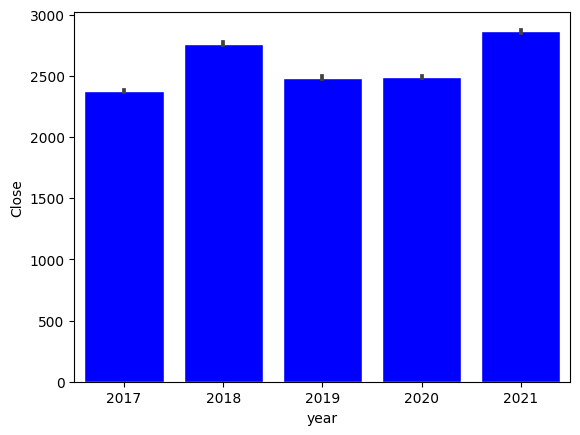

In [17]:
import seaborn as sns
sns.barplot(y = 'Close', x = 'year', color='blue',saturation = 1,edgecolor="1",data = stocks)

Average Volume Value of Top 200 Companies:  172457640.8


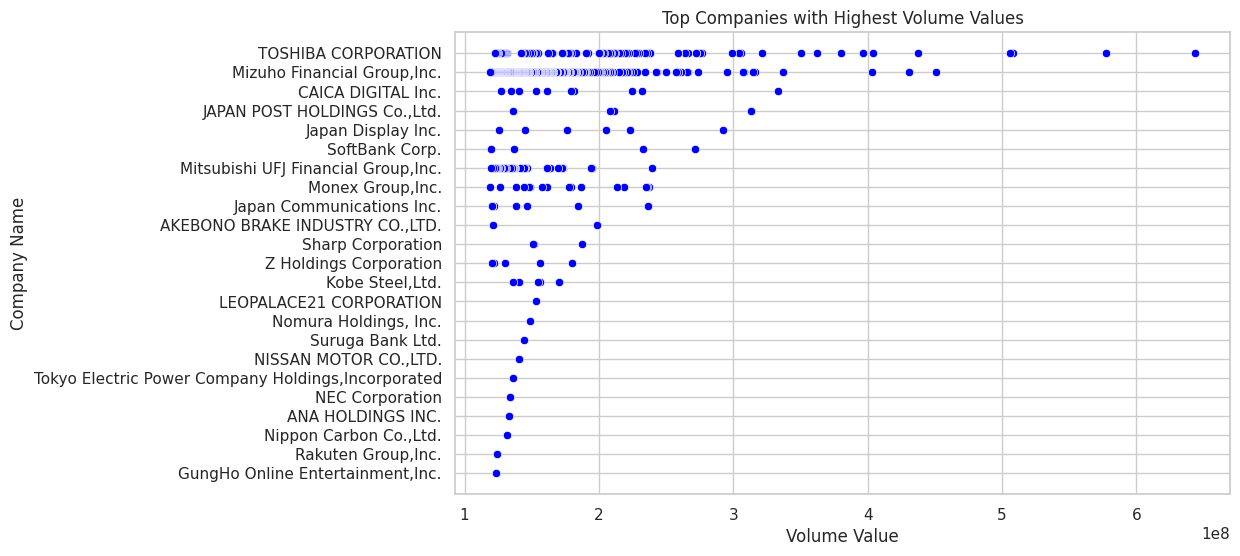

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is stored in a variable called 'stocks'
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Sort the data by 'Volume' column in descending order
stocks_sorted = stocks.sort_values(by='Volume', ascending=False)

# Select the top 10 rows from the sorted data
top_10_stocks = stocks_sorted.head(500)

# Calculate the average of 'Volume' column for the top 10 stocks
average_Volume = top_10_stocks['Volume'].mean()

# Print the average Volume value
print("Average Volume Value of Top 200 Companies: ", average_Volume)

# Plot the scatterplot
sns.scatterplot(y=top_10_stocks['Name'], x=top_10_stocks['Volume'], color='blue',edgecolor="1", data=top_10_stocks)

# Set the plot title and labels
plt.title('Top Companies with Highest Volume Values')
plt.xlabel('Volume Value')
plt.ylabel('Company Name')

# Show the plot
plt.show()


In [19]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

temp = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12), width=800))
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]

train_date=stocks.Date.unique()
returns=stocks.groupby('Date')['Target'].mean().mul(100)
close_avg=stocks.groupby('Date')['Close'].mean()
vol_avg=stocks.groupby('Date')['Volume'].mean()
high_avg= stocks.groupby('Date')['High'].mean()
low_avg= stocks.groupby('Date')['Low'].mean()

fig = make_subplots(rows=5, cols=1, 
                    shared_xaxes=True)
for i, j in enumerate([returns, close_avg, vol_avg, high_avg, low_avg]):
    fig.add_trace(go.Scatter(x=train_date, y=j, mode='lines',
                             name=j.name, marker_color=colors[i]), row=i+1, col=1)
fig.update_xaxes(rangeslider_visible=False,
                 rangeselector=dict(
                     buttons=list([
                         dict(count=1, label="1y", step="year", stepmode="backward"),
                         dict(count=2, label="2y", step="year", stepmode="backward"),
                         dict(count=3, label="3y", step="year", stepmode="backward"),
                         dict(count=4, label="4y", step="year", stepmode="backward"),
                         dict(step="all")])),
                 row=1,col=1)
fig.update_layout(template=temp,title='Target Close Volume High of JPX', 
                  hovermode='x unified', height=700, 
                  yaxis1=dict(title='Target', ticksuffix='%'), 
                  yaxis2_title='Closing Price', yaxis3_title='Volume', 
                  yaxis4_title ='High', yaxis5_title ='Low',
                  showlegend=False)
fig.show()

In [20]:
Y=stocks['Close']
X=stocks[['High','Low','Open', 'Volume']]

In [21]:
X.isnull().sum()

High      0
Low       0
Open      0
Volume    0
dtype: int64

In [22]:
X

,High,Low,Open,Volume
0,2755.0,2730.0,2734.0,31400
1,2747.0,2735.0,2743.0,17900
2,2744.0,2720.0,2734.0,19900
3,2754.0,2735.0,2745.0,24200
4,2752.0,2737.0,2748.0,9300
...,...,...,...,...
2332526,7350.0,6970.0,6970.0,772500
2332527,7240.0,6410.0,6770.0,887400
2332528,7380.0,6670.0,7190.0,496800
2332529,7870.0,7110.0,7160.0,783000


In [23]:
Y

0          2742.0
1          2738.0
2          2740.0
3          2748.0
4          2745.0
            ...  
2332526    6970.0
2332527    7020.0
2332528    7090.0
2332529    7520.0
2332530    7220.0
Name: Close, Length: 2324923, dtype: float64

In [24]:
from sklearn.preprocessing import MinMaxScaler
Scale = MinMaxScaler()
xScaled = Scale.fit_transform(X)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30)

In [26]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(1627446, 4) (1627446,) (697477, 4) (697477,)


In [27]:
X_train 

,High,Low,Open,Volume
2291624,2464.0,2410.0,2464.0,100700
105914,848.0,836.0,840.0,35100
1660631,1997.0,1954.0,1997.0,7700
930252,905.0,892.0,894.0,25800
1019772,1326.0,1299.0,1319.0,473700
...,...,...,...,...
847758,4815.0,4760.0,4770.0,315700
574802,5170.0,5120.0,5120.0,19800
2311514,644.0,624.0,639.0,367500
2101335,3070.0,3050.0,3060.0,185100


In [28]:
Y_train

2291624    2458.0
105914      848.0
1660631    1964.0
930252      902.0
1019772    1306.0
            ...  
847758     4790.0
574802     5140.0
2311514     636.0
2101335    3070.0
950371     1328.0
Name: Close, Length: 1627446, dtype: float64

In [29]:
X_test

,High,Low,Open,Volume
1885401,657.0,643.0,651.0,188000
2211282,1185.0,1172.0,1185.0,2700
1355616,1509.0,1400.0,1455.0,74400
810527,1339.0,1284.0,1284.0,13700
98738,2051.0,2026.0,2037.0,394900
...,...,...,...,...
503309,4390.0,4260.0,4260.0,31300
128875,4825.0,4770.0,4800.0,34800
1813239,1032.0,1010.0,1023.0,688400
2038412,845.0,834.0,840.0,8400


In [30]:
Y_test

1885401     657.0
2211282    1172.0
1355616    1443.0
810527     1330.0
98738      2044.0
            ...  
503309     4375.0
128875     4775.0
1813239    1012.0
2038412     845.0
2304582    3725.0
Name: Close, Length: 697477, dtype: float64

Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a LinearRegression estimator
regressor = LinearRegression()

# Fit the model to the training data
regressor.fit(X_train, Y_train)

# Use the fitted model to predict on the test data
y_pred = regressor.predict(X_test)

actual_values = Y_test

# Evaluate the model using mean squared error and R-squared
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

# Print the evaluation metrics
print('Mean squared error:', mse)
print('R-squared:', r2)

mod = pd.DataFrame({'Actual': actual_values, 'Predicted': y_pred})
df6=mod.reset_index(drop=True, inplace=True)


mod


Mean squared error: 1262.9054478277278
R-squared: 0.9999023708788307


,Actual,Predicted
0,657.0,649.778586
1,1172.0,1175.294603
2,1443.0,1453.175560
3,1330.0,1328.114388
4,2044.0,2040.411639
...,...,...
697472,4375.0,4364.643769
697473,4775.0,4798.075355
697474,1012.0,1020.229159
697475,845.0,839.759799


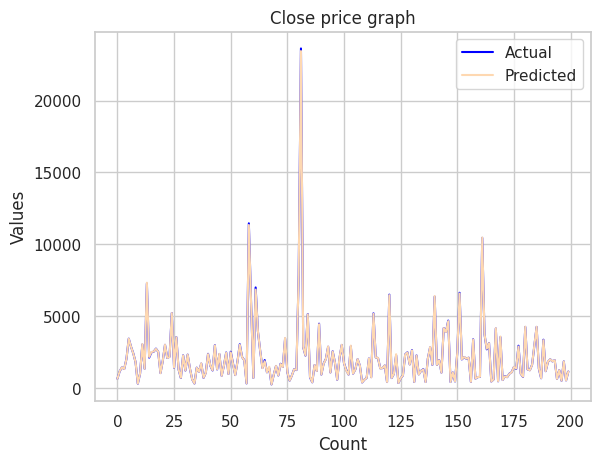

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming mod['Actual'] and mod['Predicted'] are pandas Series with more than 200 values

# Extract the first 200 values from mod['Actual'] and mod['Predicted']
actual_values = mod['Actual'][:200]
predicted_values = mod['Predicted'][:200]

# Plot the first 200 values
plt.plot(actual_values, label='Actual', color='blue')
plt.plot(predicted_values, label='Predicted', color='#FED8B1')

plt.legend()
plt.title('Line Plot of Actual and Predicted values')
plt.title("Close price graph")
plt.xlabel("Count")
plt.ylabel("Values")
plt.show()


In [33]:
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from sklearn import metrics
import tensorflow as tf
from keras.layers import Dense, LSTM, Dropout,Flatten

model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error',metrics=[tf.keras.metrics.CategoricalAccuracy()])
history=model.fit(X_train,Y_train,epochs=5,batch_size=32)

Epoch 1/5
50858/50858 [==============================] - 721s 14ms/step - loss: 14924986.0000 - categorical_accuracy: 1.0000
Epoch 2/5
50858/50858 [==============================] - 714s 14ms/step - loss: 10438816.0000 - categorical_accuracy: 1.0000
Epoch 3/5
50858/50858 [==============================] - 707s 14ms/step - loss: 8772843.0000 - categorical_accuracy: 1.0000
Epoch 4/5
50858/50858 [==============================] - 701s 14ms/step - loss: 8526148.0000 - categorical_accuracy: 1.0000
Epoch 5/5
50858/50858 [==============================] - 688s 14ms/step - loss: 8552802.0000 - categorical_accuracy: 1.0000


In [34]:
train_predict2=model.predict(X_train)
test_predict2=model.predict(X_test)
train_predict2.shape, test_predict2.shape

21797/21797 [==============================] - 84s 4ms/step


((1627446, 1), (697477, 1))

In [43]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
print("Test data RMSE: ", math.sqrt(mean_squared_error(Y_test,test_predict2)))
print("Test data MSE: ", mean_squared_error(Y_test,test_predict2))
print("Test data MAE: ", mean_absolute_error(Y_test,test_predict2))
print("Test data R2: ", r2_score(Y_test,test_predict2))

Test data RMSE:  3351.681719078632
Test data MSE:  11233770.346005892
Test data MAE:  1415.0140554324826
Test data R2:  0.13157146626843652


In [36]:
l_pred=model.predict(X_test)
l_pred=l_pred.flatten()

21797/21797 [==============================] - 89s 4ms/step


In [48]:
df3 = pd.DataFrame({'Actual': Y_test, 'Predicted': l_pred})
df4=df3.reset_index(drop=True, inplace=True)


df3.head(20)

,Actual,Predicted
0,657.0,1960.270386
1,1172.0,2155.800049
2,1443.0,2241.107910
3,1330.0,2190.562256
4,2044.0,3159.840820
5,3440.0,3320.848389
6,2879.0,3320.847900
7,2417.0,3320.483154
8,1816.0,2795.995850
9,310.0,834.436646


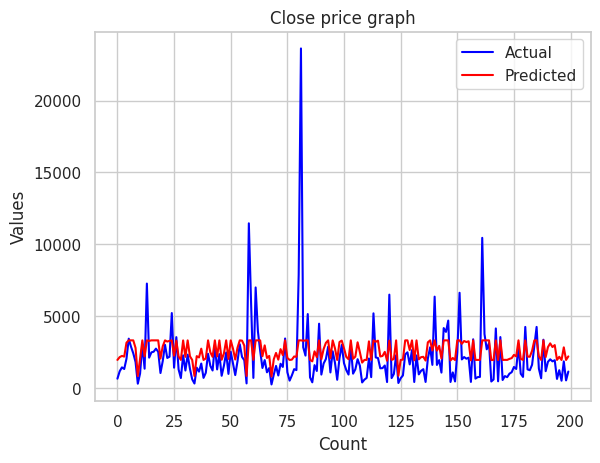

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df3['Actual'] and df3['Predicted'] are pandas Series with more than 200 values

# Extract the first 200 values from df3['Actual'] and df3['Predicted']
actual_values = df3['Actual'][:200]
predicted_values = df3['Predicted'][:200]

# Plot the first 200 values
plt.plot(actual_values, label='Actual', color='blue')
plt.plot(predicted_values, label='Predicted', color='red')

plt.legend()
plt.title('Line Plot of Actual and Predicted values')
plt.title("Close price graph")
plt.xlabel("Count")
plt.ylabel("Values")
plt.show()


Adaboost Regressor

In [39]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create an AdaBoostRegressor object with LinearRegression as the base estimator
adaboost = AdaBoostRegressor(base_estimator=regressor)

# Fit the AdaBoost model to the training data
adaboost.fit(X_train, Y_train)

# Use the fitted model to predict on the test data
y_pred = adaboost.predict(X_test)

actual_values = Y_test

# Evaluate the model using mean squared error and R-squared
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

# Print the evaluation metrics
print('Mean squared error:', mse)
print('R-squared:', r2)

mod1 = pd.DataFrame({'Actual': actual_values, 'Predicted': y_pred})
df6=mod1.reset_index(drop=True, inplace=True)


mod1

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



Mean squared error: 8317.57335593983
R-squared: 0.9993570085722581


,Actual,Predicted
0,657.0,650.373221
1,1172.0,1175.258441
2,1443.0,1455.607830
3,1330.0,1341.156729
4,2044.0,2040.438822
...,...,...
697472,4375.0,4323.951888
697473,4775.0,4721.702403
697474,1012.0,1020.273456
697475,845.0,840.261957


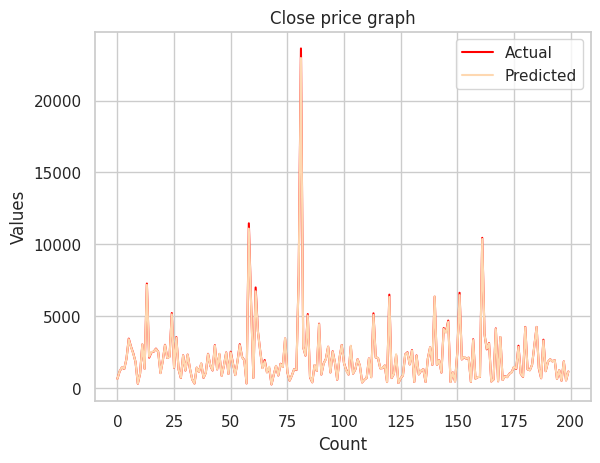

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming mod1['Actual'] and mod1['Predicted'] are pandas Series with more than 200 values

# Extract the first 200 values from mod1['Actual'] and mod1['Predicted']
actual_values = mod1['Actual'][:200]
predicted_values = mod1['Predicted'][:200]

# Plot the first 200 values
plt.plot(actual_values, label='Actual', color='red')
plt.plot(predicted_values, label='Predicted', color='#FED8B1')

plt.legend()
plt.title('Line Plot of Actual and Predicted values')
plt.title("Close price graph")
plt.xlabel("Count")
plt.ylabel("Values")
plt.show()


Lasso Regressor

In [54]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Create a Lasso estimator
regressor = Lasso()

# Fit the model to the training data
regressor.fit(X_train, Y_train)

# Use the fitted model to predict on the test data
y_pred = regressor.predict(X_test)

# Access the actual values of the target variable for the test data
actual_values = Y_test

# Print the actual and predicted values
# print('Actual values:', actual_values)
# print('Predicted values:', y_pred)

# Evaluate the model using mean squared error and R-squared
mse = mean_squared_error(actual_values, y_pred)
r2 = r2_score(actual_values, y_pred)

# Print the evaluation metrics
print('Mean squared error:', mse)
print('R-squared:', r2)

df4 = pd.DataFrame({'Actual': actual_values, 'Predicted': y_pred})
df5=df4.reset_index(drop=True, inplace=True)


df4

Mean squared error: 2724.0471719141037
R-squared: 0.9997894170684946


,Actual,Predicted
0,657.0,648.428840
1,1172.0,1170.776791
2,1443.0,1481.418076
3,1330.0,1324.730168
4,2044.0,2028.983664
...,...,...
697472,4375.0,4346.253230
697473,4775.0,4773.656092
697474,1012.0,1018.836235
697475,845.0,835.211228


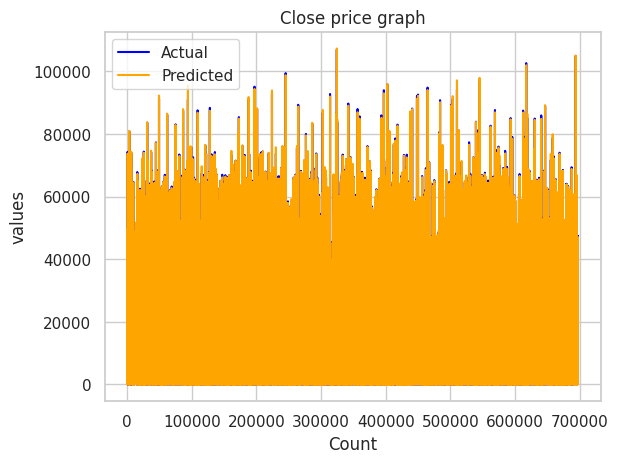

<Figure size 20000x20000 with 0 Axes>

In [68]:
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.plot(df4['Actual'], label='Actual', color='blue')
plt.plot(df4['Predicted'], label='Predicted', color='orange')
plt.legend()
plt.title('Line Plot of Actual and Predicted values')
plt.title("Close price graph")
plt. xlabel("Count")
plt.ylabel("values")
plt.figure(figsize=(200, 200))
plt.show()